# Calibration and pricing under Heston model using deel learning algorithms.



In [1]:
import os
os.chdir("Data")

In [2]:
import gzip
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
f = gzip.GzipFile('HestonTrainSet.txt.gz', "r")
dat=np.load(f)
print(dat.shape)
xx=dat[:,:5]
yy=dat[:,5:]
print(xx.shape)
print(yy.shape)
strikes=np.array([0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.2,1.3,1.4,1.5 ])
maturities=np.array([0.1,0.3,0.6,0.9,1.2,1.5,1.8,2.0 ])

(12000, 93)
(12000, 5)
(12000, 88)


In [3]:
strikes_dim=len(strikes)
maturities_dim=len(maturities)

In [4]:
strikes_dim

11

In [5]:
maturities_dim

8

In [6]:
len(dat)

12000

In [7]:
data_frame = pd.DataFrame(dat)

In [8]:
type(data_frame)

pandas.core.frame.DataFrame

In [9]:
data_frame.shape

(12000, 93)

In [10]:
data_frame.columns

RangeIndex(start=0, stop=93, step=1)

In [11]:
columns = ["$\\rho$-spot-vol correlation","$v$-vol of vol","$\\theta$-long term vol","$\\kappa$-speed of mean reversion","$\\xi_{0}$-forward variance curve"]
lst = ["y_"+ str(i) for i in range(1,89)]
columns.extend(lst)

In [12]:
data_frame.columns = columns
data_frame.head()

,$\rho$-spot-vol correlation,$v$-vol of vol,$\theta$-long term vol,$\kappa$-speed of mean reversion,$\xi_{0}$-forward variance curve,y_1,y_2,y_3,y_4,y_5,...,y_79,y_80,y_81,y_82,y_83,y_84,y_85,y_86,y_87,y_88
0,0.016840,-0.124106,0.876229,0.164721,9.580288,0.351275,0.321272,0.294827,0.272889,0.258973,...,0.391454,0.391977,0.392578,0.393221,0.393885,0.394556,0.395226,0.395891,0.396546,0.397191
1,0.015854,-0.266165,0.140586,0.165832,7.190494,0.303108,0.235170,0.235567,0.237021,0.239069,...,0.392158,0.392608,0.393003,0.393357,0.393676,0.393969,0.394238,0.394487,0.394720,0.394938
2,0.011428,-0.337197,0.864070,0.052406,8.424803,0.334141,0.247264,0.215370,0.183602,0.152755,...,0.207557,0.209541,0.212320,0.215543,0.218976,0.222469,0.225933,0.229315,0.232585,0.235730
3,0.018240,-0.164814,0.952380,0.141195,9.059640,0.347968,0.314932,0.284821,0.258275,0.239569,...,0.359349,0.360200,0.361182,0.362233,0.363318,0.364413,0.365505,0.366585,0.367648,0.368690
4,0.003158,-0.422433,0.988612,0.111454,7.498527,0.298448,0.253565,0.222731,0.193363,0.169673,...,0.298614,0.302998,0.307304,0.311453,0.315409,0.319165,0.322723,0.326092,0.329283,0.332309


In [13]:
data_frame.describe()

,$\rho$-spot-vol correlation,$v$-vol of vol,$\theta$-long term vol,$\kappa$-speed of mean reversion,$\xi_{0}$-forward variance curve,y_1,y_2,y_3,y_4,y_5,...,y_79,y_80,y_81,y_82,y_83,y_84,y_85,y_86,y_87,y_88
count,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,...,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000
mean,0.017426,-0.347860,0.660579,0.140172,6.450732,0.324909,0.270824,0.240752,0.221427,0.207682,...,0.338974,0.341100,0.343418,0.345801,0.348178,0.350506,0.352763,0.354937,0.357025,0.359025
std,0.012141,0.207770,0.331059,0.041642,2.223446,0.024270,0.030733,0.036186,0.035857,0.039859,...,0.060284,0.059421,0.058528,0.057664,0.056862,0.056136,0.055491,0.054924,0.054432,0.054009
min,0.000101,-0.949763,0.010014,0.013286,1.017702,0.283580,0.206712,0.145887,0.100080,0.084540,...,0.127350,0.127425,0.126915,0.128125,0.128535,0.128802,0.129058,0.129304,0.129540,0.129766
25%,0.006302,-0.450684,0.499555,0.109512,4.709769,0.308217,0.240731,0.215082,0.198572,0.182535,...,0.298291,0.301262,0.304366,0.307488,0.310790,0.314017,0.316712,0.319326,0.322048,0.324349
50%,0.016340,-0.280952,0.801112,0.147269,6.595191,0.319762,0.277431,0.249701,0.226991,0.210799,...,0.350132,0.351740,0.354020,0.356228,0.358601,0.360891,0.363347,0.365509,0.367954,0.370166
75%,0.027826,-0.191420,0.912898,0.175472,8.355757,0.336029,0.293617,0.267331,0.246886,0.236953,...,0.388000,0.389515,0.391005,0.392323,0.393831,0.395663,0.397434,0.399117,0.400879,0.402515
max,0.039992,-0.100011,0.999971,0.200000,9.999741,0.561774,0.369392,0.326016,0.306154,0.303565,...,0.435877,0.435957,0.436027,0.436089,0.436360,0.436655,0.436924,0.437745,0.439484,0.441119


# Step 1: Data Generation


## **Inputs:** 
###  1. $\rho$ spot-vol correlation,
###  2. $\nu$ vol of vol
###  3. $\theta$ long term vol
###  4. $\kappa$ speed of mean reversion 
###  5. $\xi_{0}$ forward variance curve
    
    
## **Outputs:**
### $y_{1}$ to $y_{88}$= Implied volatility surface (11 strikes x 8 maturities = 88 points)

# Scaling:

# Model Parameters $\theta\to scale(\theta)\in[-1,1]$
## $scale(\theta^i)=\frac{2\theta^i-(\theta^i_{max}-\theta^i_{min})}{\theta^i_{max}-\theta^i_{min}},\quad i \in |\Theta|$

# Implied volatilities
## $$scale(\sigma_{BS}^{i,j})=\frac{\sigma_{BS}^{i,j}-\mathbb{E}[\sigma_{BS}^{i,j}]}{std(\sigma_{BS}^{i,j})},\quad i\in\text{Maturities},\; j\in \text{Strikes}$$

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    yy, xx, test_size=0.15, random_state=42)
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
scale2=  StandardScaler()
y_train_transform = scale.fit_transform(y_train)
y_test_transform = scale.transform(y_test)
x_train_transform = scale2.fit_transform(X_train)
x_test_transform = scale2.transform(X_test)

In [15]:
def xtransform(X_train,X_test):
    return [scale2.transform(X_train),scale2.transform(X_test)]

    
[x_train_transform,x_test_transform]=xtransform(X_train,X_test)

def xinversetransform(x):
    return scale2.inverse_transform(x)

In [16]:
ub=[0.04,-0.1,1.0,0.2,10.0]
lb=[0.0001,-0.95,0.01,0.01,1]
def myscale(x):
    res=np.zeros(5)
    for i in range(5):
        res[i]=(x[i] - (ub[i] + lb[i])*0.5) * 2 / (ub[i] - lb[i])
        
    return res
def myinverse(x):
    res=np.zeros(5)
    for i in range(5):
        res[i]=x[i]*(ub[i] - lb[i]) *0.5 + (ub[i] + lb[i])*0.5
        
    return res

# Create the Neural Network

In [17]:
import tensorflow.keras
from tensorflow.keras.layers import Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects
tensorflow.keras.backend.set_floatx('float64')


input1 = tensorflow.keras.layers.Input(shape=(5,))
x1 = tensorflow.keras.layers.Dense(30,activation = 'elu')(input1)
x2=tensorflow.keras.layers.Dense(30,activation = 'elu')(x1) 
x3=tensorflow.keras.layers.Dense(30,activation = 'elu')(x2) 


x4=tensorflow.keras.layers.Dense(88,activation = 'linear')(x3)


modelGEN = tensorflow.keras.models.Model(inputs=input1, outputs=x4)
modelGEN.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 5)]               0         
_________________________________________________________________
dense (Dense)                (None, 30)                180       
_________________________________________________________________
dense_1 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_2 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_3 (Dense)              (None, 88)                2728      
Total params: 4,768
Trainable params: 4,768
Non-trainable params: 0
_________________________________________________________________


# Fit the Neural Network (No need to run the code, parameters are stored on a .h5 file)

In [18]:
def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true)))
modelGEN.compile(loss = root_mean_squared_error, optimizer = "adam")

modelGEN.fit(y_train_transform, x_train_transform, batch_size=32,validation_data = (y_test_transform,x_test_transform),epochs = 200, verbose = True,shuffle=1)#,callbacks=[earlystop])

Train on 10200 samples, validate on 1800 samples
Epoch 1/200
10200/10200 [==============================] - 1s 66us/sample - loss: 0.3479 - val_loss: 0.1744
Epoch 2/200
10200/10200 [==============================] - 0s 27us/sample - loss: 0.1473 - val_loss: 0.1365
Epoch 3/200
10200/10200 [==============================] - 0s 27us/sample - loss: 0.1193 - val_loss: 0.1124
Epoch 4/200
10200/10200 [==============================] - 0s 29us/sample - loss: 0.0978 - val_loss: 0.0909
Epoch 5/200
10200/10200 [==============================] - 0s 33us/sample - loss: 0.0833 - val_loss: 0.0784
Epoch 6/200
10200/10200 [==============================] - 0s 36us/sample - loss: 0.0739 - val_loss: 0.0709
Epoch 7/200
10200/10200 [==============================] - 0s 36us/sample - loss: 0.0672 - val_loss: 0.0642
Epoch 8/200
10200/10200 [==============================] - 0s 36us/sample - loss: 0.0629 - val_loss: 0.0616
Epoch 9/200
10200/10200 [==============================] - 0s 35us/sample - loss: 0.060

Epoch 76/200
10200/10200 [==============================] - 1s 52us/sample - loss: 0.0320 - val_loss: 0.0309
Epoch 77/200
10200/10200 [==============================] - 1s 61us/sample - loss: 0.0321 - val_loss: 0.0318
Epoch 78/200
10200/10200 [==============================] - 1s 96us/sample - loss: 0.0320 - val_loss: 0.0318
Epoch 79/200
10200/10200 [==============================] - 1s 72us/sample - loss: 0.0319 - val_loss: 0.0326
Epoch 80/200
10200/10200 [==============================] - 1s 83us/sample - loss: 0.0319 - val_loss: 0.0340
Epoch 81/200
10200/10200 [==============================] - 0s 32us/sample - loss: 0.0329 - val_loss: 0.0321
Epoch 82/200
10200/10200 [==============================] - 0s 48us/sample - loss: 0.0319 - val_loss: 0.0321
Epoch 83/200
10200/10200 [==============================] - 0s 27us/sample - loss: 0.0320 - val_loss: 0.0330
Epoch 84/200
10200/10200 [==============================] - 0s 26us/sample - loss: 0.0320 - val_loss: 0.0315
Epoch 85/200
10200/

10200/10200 [==============================] - 0s 26us/sample - loss: 0.0295 - val_loss: 0.0291
Epoch 151/200
10200/10200 [==============================] - 0s 33us/sample - loss: 0.0293 - val_loss: 0.0292
Epoch 152/200
10200/10200 [==============================] - 0s 33us/sample - loss: 0.0292 - val_loss: 0.0288
Epoch 153/200
10200/10200 [==============================] - 0s 34us/sample - loss: 0.0293 - val_loss: 0.0276
Epoch 154/200
10200/10200 [==============================] - 0s 33us/sample - loss: 0.0295 - val_loss: 0.0301
Epoch 155/200
10200/10200 [==============================] - 0s 39us/sample - loss: 0.0294 - val_loss: 0.0290
Epoch 156/200
10200/10200 [==============================] - 0s 31us/sample - loss: 0.0294 - val_loss: 0.0288
Epoch 157/200
10200/10200 [==============================] - 0s 27us/sample - loss: 0.0289 - val_loss: 0.0291
Epoch 158/200
10200/10200 [==============================] - 0s 27us/sample - loss: 0.0290 - val_loss: 0.0304
Epoch 159/200
10200/1020

## Store/Load optimal NN parameters

In [19]:
modelGEN.save_weights('HestonNNWeights.h5')

In [20]:
modelGEN.load_weights('HestonNNWeights.h5')

In [21]:
NNParameters=[]
for i in range(1,len(modelGEN.layers)):
    NNParameters.append(modelGEN.layers[i].get_weights())

In [22]:
NN = np.array(NNParameters)
NN.shape

(4, 2)

# Numpy Implementation of the Neural Network tends to be faster than Keras

In [23]:
NumLayers=3
def elu(x):
    #Careful function ovewrites x
    ind=(x<0)
    x[ind]=np.exp(x[ind])-1
    return x
def eluPrime(y):
    # we make a deep copy of input x
    x=np.copy(y)
    ind=(x<0)
    x[ind]=np.exp(x[ind])
    x[~ind]=1
    return x
def NeuralNetwork(x):
    #print(type(x))
    #print(x)
    input1=x
    for i in range(NumLayers):
        input1=np.dot(input1,NNParameters[i][0])+NNParameters[i][1]
        #Elu activation
        input1=elu(input1)
    #The output layer is linnear
    i+=1
    return np.dot(input1,NNParameters[i][0])+NNParameters[i][1]
def NeuralNetworkGradient(x):
    input1=x
    #Identity Matrix represents Jacobian with respect to initial parameters
    grad=np.eye(5)
    #Propagate the gradient via chain rule
    for i in range(NumLayers):
        input1=(np.dot(input1,NNParameters[i][0])+NNParameters[i][1])
        grad=(np.einsum('ij,jk->ik', grad, NNParameters[i][0]))
        #Elu activation
        grad*=eluPrime(input1)
        input1=elu(input1)
    #input1.append(np.dot(input1[i],NNParameters[i+1][0])+NNParameters[i+1][1])
    grad=np.einsum('ij,jk->ik',grad,NNParameters[i+1][0])
    #grad stores all intermediate Jacobians, however only the last one is used here as output
    return grad

# Compute Implied volatility relative errors on Test set

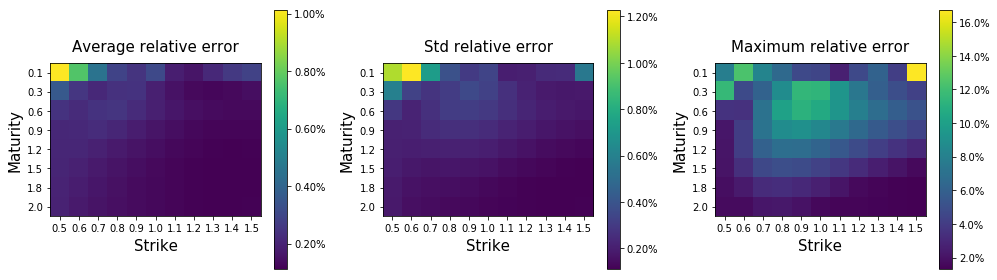

In [24]:
import numpy as np
import csv
S0=1.
strikes_dim=len(strikes)
maturities_dim=len(maturities)
strikeslabel=np.round(np.linspace(strikes[0],strikes[-1],8),1)
maturitieslabel=np.array([0.1,0.2, 0.6, 1.5,1.8])
##### AVERAGE VALUES #######
X_sample = xinversetransform(x_test_transform)
y_sample = y_test_transform

prediction=[xinversetransform(modelGEN.predict(y_sample[i].reshape(1,5))[0]) for i in range(len(y_sample))]
plt.figure(1,figsize=(14,4))
ax=plt.subplot(1,3,1)
err = np.mean(100*np.abs((X_sample-prediction)/X_sample),axis = 0)
plt.title("Average relative error",fontsize=15,y=1.04)
plt.imshow(err.reshape(maturities_dim,strikes_dim))
plt.colorbar(format=mtick.PercentFormatter())

ax.set_xticks(np.linspace(0,len(strikes)-1,len(strikes)))
ax.set_xticklabels(strikes)
ax.set_yticks(np.linspace(0,len(maturities)-1,len(maturities)))
ax.set_yticklabels(maturities)
plt.xlabel("Strike",fontsize=15,labelpad=5)
plt.ylabel("Maturity",fontsize=15,labelpad=5)

ax=plt.subplot(1,3,2)
err = 100*np.std(np.abs((X_sample-prediction)/X_sample),axis = 0)
plt.title("Std relative error",fontsize=15,y=1.04)
plt.imshow(err.reshape(maturities_dim,strikes_dim))
plt.colorbar(format=mtick.PercentFormatter())
ax.set_xticks(np.linspace(0,len(strikes)-1,len(strikes)))
ax.set_xticklabels(strikes)
ax.set_yticks(np.linspace(0,len(maturities)-1,len(maturities)))
ax.set_yticklabels(maturities)
plt.xlabel("Strike",fontsize=15,labelpad=5)
plt.ylabel("Maturity",fontsize=15,labelpad=5)

ax=plt.subplot(1,3,3)
err = 100*np.max(np.abs((X_sample-prediction)/X_sample),axis = 0)
plt.title("Maximum relative error",fontsize=15,y=1.04)
plt.imshow(err.reshape(maturities_dim,strikes_dim))
plt.colorbar(format=mtick.PercentFormatter())
ax.set_xticks(np.linspace(0,len(strikes)-1,len(strikes)))
ax.set_xticklabels(strikes)
ax.set_yticks(np.linspace(0,len(maturities)-1,len(maturities)))
ax.set_yticklabels(maturities)
plt.xlabel("Strike",fontsize=15,labelpad=5)
plt.ylabel("Maturity",fontsize=15,labelpad=5)
plt.tight_layout()
plt.savefig('HestonNNErrors.png', dpi=300)
plt.show()


In [25]:
nl=np.array(x_test_transform)
nl.shape

(1800, 88)

In [26]:
nk=np.array(xinversetransform(x_test_transform))
nk.shape

(1800, 88)

In [27]:
err = np.max(100*np.abs((X_sample-prediction)/X_sample),axis = 0)
err

array([ 7.91884303, 12.38674841,  8.25440023,  6.57252598,  4.69938557,
        4.53511483,  2.66211504,  4.68749433,  6.13547888,  4.13394426,
       16.73461659, 11.63048872,  4.74886536,  6.1513201 ,  8.79643353,
       11.50917469, 11.37146479,  9.32478124,  7.42080067,  6.0002068 ,
        4.99790883,  4.26303512,  3.55191863,  3.48791316,  7.1180395 ,
       10.13943108, 11.24516847, 10.65689403,  9.32175035,  7.97713595,
        6.82706792,  5.89570276,  5.18902952,  2.26222176,  4.10175496,
        7.17248913,  8.81442429,  9.05915756,  8.4571835 ,  7.52693041,
        6.56725752,  5.69367048,  4.98060639,  4.38614996,  2.18370009,
        4.07708117,  6.08858883,  6.87064424,  6.82359814,  6.28082974,
        5.5777812 ,  4.84700815,  4.17034537,  3.57764908,  3.07374978,
        2.08955241,  3.39904314,  4.64746396,  5.00304615,  4.81996802,
        4.35023259,  3.77224622,  3.17979571,  2.62479683,  2.13038558,
        1.71073658,  1.85167634,  2.42740394,  3.17059572,  3.30

In [28]:
nz=np.array(err)
nz.shape

(88,)

# Plot sample Smiles

[ 0.02108291 -0.414645    0.85620102  0.06027235  8.26419368]


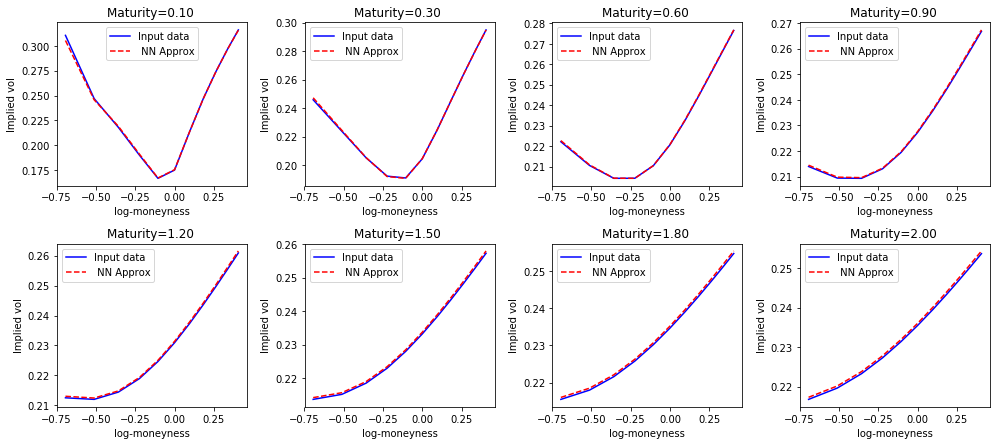

In [29]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import csv
import scipy
S0=1.

sample_ind = 1250
X_sample = X_test[sample_ind]
y_sample = y_test_transform[sample_ind]
print(scale.inverse_transform(y_sample))

prediction=xinversetransform(modelGEN.predict(y_sample.reshape(1,5))[0])
plt.figure(1,figsize=(14,12))
for i in range(maturities_dim):
    plt.subplot(4,4,i+1)
    
    plt.plot(np.log(strikes/S0),X_sample[i*strikes_dim:(i+1)*strikes_dim],'b',label="Input data")
    plt.plot(np.log(strikes/S0),prediction[i*strikes_dim:(i+1)*strikes_dim],'--r',label=" NN Approx")

    
    plt.title("Maturity=%1.2f "%maturities[i])
    plt.xlabel("log-moneyness")
    plt.ylabel("Implied vol")
    
    plt.legend()
plt.tight_layout()
plt.show()

# Use gradient methods for optimisation

In [30]:
def CostFunc(x,sample_ind):
    return np.sum(np.power((NeuralNetwork(x)-x_test_transform[sample_ind]),2))
def Jacobian(x,sample_ind):
    return 2*np.sum((NeuralNetwork(x)-x_test_transform[sample_ind])*NeuralNetworkGradient(x),axis=1)
#Cost Function for Levenberg Marquardt
def CostFuncLS(x,sample_ind):
    return (NeuralNetwork(x)-x_test_transform[sample_ind])
def JacobianLS(x,sample_ind):
    return NeuralNetworkGradient(x).T

In [31]:
import time
import scipy
Approx=[]
Timing=[]
sample_ind = 500
X_sample = X_test[sample_ind]
y_sample = y_test_transform[sample_ind]
solutions=np.zeros([4,5])
times=np.zeros(4)
init=np.zeros(5)
for i in range(1800):
    disp=str(i+1)+"/1800"
    print (disp,end="\r")
    #L-BFGS-B
    start= time.time()
    I=scipy.optimize.minimize(CostFunc,x0=init,args=i,method='L-BFGS-B',jac=Jacobian,tol=1E-10,options={"maxiter":5000})
    end= time.time()
    solutions[0,:]=myinverse(I.x)
    times[0]=end-start
    #SLSQP
    start= time.time()
    I=scipy.optimize.minimize(CostFunc,x0=init,args=i,method='SLSQP',jac=Jacobian,tol=1E-10,options={"maxiter":5000})
    end= time.time()
    solutions[1,:]=myinverse(I.x)
    times[1]=end-start
    #BFGS
    start= time.time()
    I=scipy.optimize.minimize(CostFunc,x0=init,args=i,method='BFGS',jac=Jacobian,tol=1E-10,options={"maxiter":5000})
    end= time.time()
    solutions[2,:]=myinverse(I.x)
    times[2]=end-start
    #Levenberg-Marquardt
    start= time.time()
    I=scipy.optimize.least_squares(CostFuncLS,init, JacobianLS,args=(i,),gtol=1E-10)
    end= time.time()
    solutions[3,:]=myinverse(I.x)
    times[3]=end-start
    
    Approx.append(np.copy(solutions))
    Timing.append(np.copy(times))

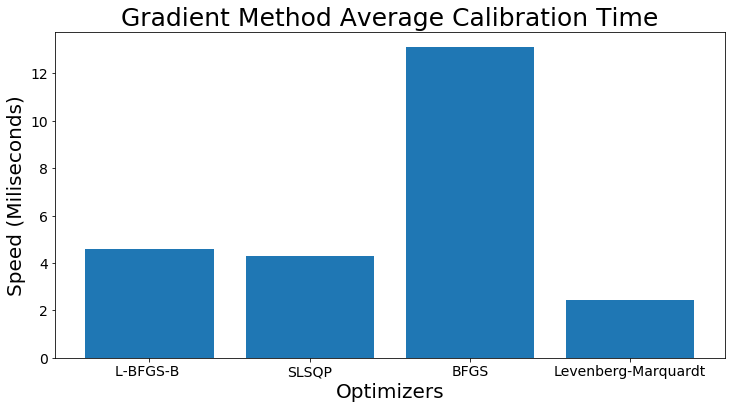

In [32]:
methods=["L-BFGS-B ","SLSQP","BFGS","Levenberg-Marquardt"]
plt.figure(1,figsize=(12,6))
plt.bar(methods,np.mean(Timing,axis=0)*1000)
plt.title("Gradient Method Average Calibration Time",fontsize=25)
plt.ylabel("Speed (Miliseconds)",fontsize=20)
plt.xlabel("Optimizers",fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

# Save the Lavenberg-Marquardt Optimal parameters

In [33]:
LMParameters=[Approx[i][3] for i in range(len(Approx))]
np.savetxt("NNParametersHeston.txt",LMParameters)
LMParameters = np.loadtxt("NNParametersHeston.txt")

# Calibration Errors with Levenberg-Marquardt

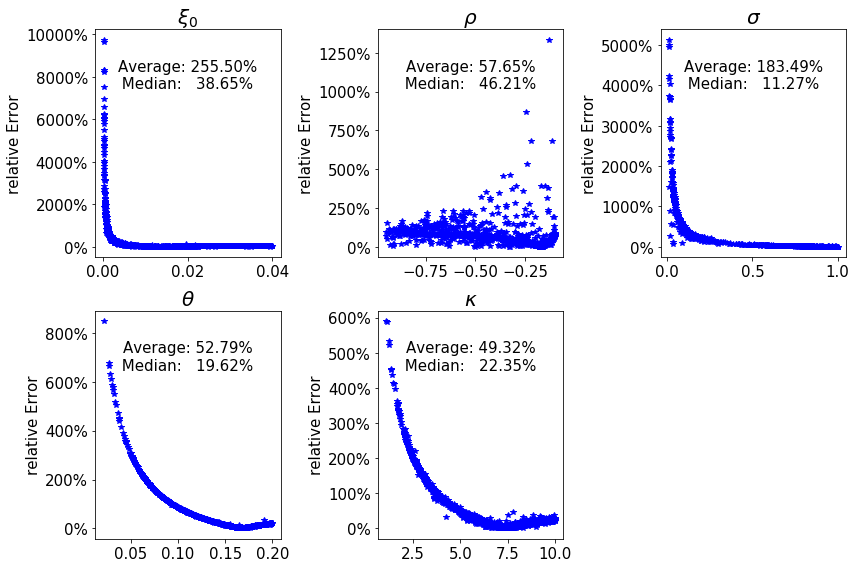

In [34]:
titles=["$\\xi_0$","$\\rho$","$\\sigma$","$\\theta$", "$\\kappa$"]
average=np.zeros([5,1800])
fig=plt.figure(figsize=(12,8))
for u in range(5):
    ax=plt.subplot(2,3,u+1)
    y=y_test[:1800,u]
    plt.plot(y,100*np.abs(LMParameters[:1800,u]-y)/np.abs(y),'b*')
    average[u,:]=np.abs(LMParameters[:1800,u]-y)/np.abs(y)
    
    plt.title(titles[u],fontsize=20)
    plt.ylabel('relative Error',fontsize=15)
    plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter() )
    plt.tick_params(axis='both', which='major', labelsize=15)
    plt.tick_params(axis='both', which='minor', labelsize=15)
    plt.text(0.5, 0.8, 'Average: %1.2f%%\n Median:   %1.2f%% '%(np.mean(100*average[u,:]),np.quantile(100*average[u,:],0.5)), horizontalalignment='center',verticalalignment='center', transform=ax.transAxes,fontsize=15)
plt.tight_layout()

plt.savefig('HestonParameterRelativeErrors.png', dpi=300)
plt.show()

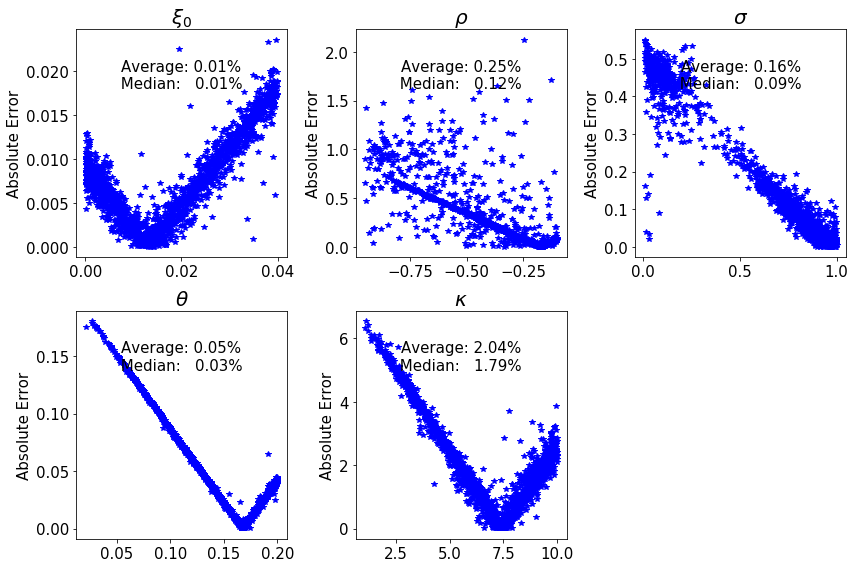

In [35]:
titles=["$\\xi_0$","$\\rho$","$\\sigma$","$\\theta$", "$\\kappa$"]
average=np.zeros([5,1800])
fig=plt.figure(figsize=(12,8))
for u in range(5):
    ax=plt.subplot(2,3,u+1)
    y=y_test[:1800,u]
    plt.plot(y,np.abs(LMParameters[:1800,u]-y),'b*')
    average[u,:]=np.abs(LMParameters[:1800,u]-y)
    
    plt.title(titles[u],fontsize=20)
    plt.ylabel('Absolute Error',fontsize=15)
    #plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter() )
    plt.tick_params(axis='both', which='major', labelsize=15)
    plt.tick_params(axis='both', which='minor', labelsize=15)
    plt.text(0.5, 0.8, 'Average: %1.2f%%\n Median:   %1.2f%% '%(np.mean(average[u,:]),np.quantile(average[u,:],0.5)), horizontalalignment='center',verticalalignment='center', transform=ax.transAxes,fontsize=15)
plt.tight_layout()

plt.savefig('HestonParameterAbsoluteErrors.png', dpi=300)
plt.show()